<a href="https://colab.research.google.com/github/GEMCorp/CropDamage-Prediction/blob/main/AAKTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To Do

## A brief explanation of approach including;

   1. Any data pre-processing performed.

   2. Your chosen ML model with justification.

   3. Performance evaluation of the chosen model and obtained results.

   4. Comparison with the performance of other ML models where relevant.

# Loading the dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
dataset_directory = '/content/drive/My Drive/AAKTP'

In [ ]:
import os
os.listdir(dataset_directory)

['train_crop.csv',
 'test_crop.xlsx',
 'Task_Harvest Evaluation using Machine Learning.docx']

# Preprocessing and EDA

## Importing libraries for data cleaning and EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sb

## Examining and understanding content of the data

In [ ]:
train_dataframe = pd.read_csv(dataset_directory + '/train_crop.csv')

In [ ]:
train_dataframe.shape

(88858, 10)

In [ ]:
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


Dataset contains 10 columns with various data types which can provide a very rich amount of information for data exploration.Also it can be seen already that number of weeks used has some missing values which will require cleaning.

In [ ]:
train_dataframe.describe() # works for ints and floats

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [ ]:
train_dataframe.describe(include=object) #including objects

,ID
count,88858
unique,88858
top,F00000001
freq,1


In [ ]:
train_dataframe

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [ ]:
train_dataframe.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

## Cleaning The Data

Categorical features and target are already ordinalEncoded, NaN values and standardization needs to be done. Find some correlation between number of weeks used and other features/target to determine dropping or imputing. No need for discretization and non-linear transformation. Might have to use polynomial features later.

In [ ]:
# manually inspecting to for any obvious correllation
train_dataframe[train_dataframe.Number_Weeks_Used.isnull()]

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
10,F00000021,1212,1,0,1,0,NaN,0,3,0
17,F00000037,2401,0,1,1,0,NaN,0,1,1
35,F00000076,257,0,0,3,30,NaN,0,2,0
...,...,...,...,...,...,...,...,...,...,...
88786,F00155793,1785,1,0,2,60,NaN,16,2,0
88788,F00155801,1898,1,0,2,15,NaN,3,1,0
88825,F00155882,2542,1,0,2,10,NaN,21,2,0
88833,F00155899,2687,1,0,2,10,NaN,21,2,0


<Axes: xlabel='Pesticide_Use_Category', ylabel='count'>

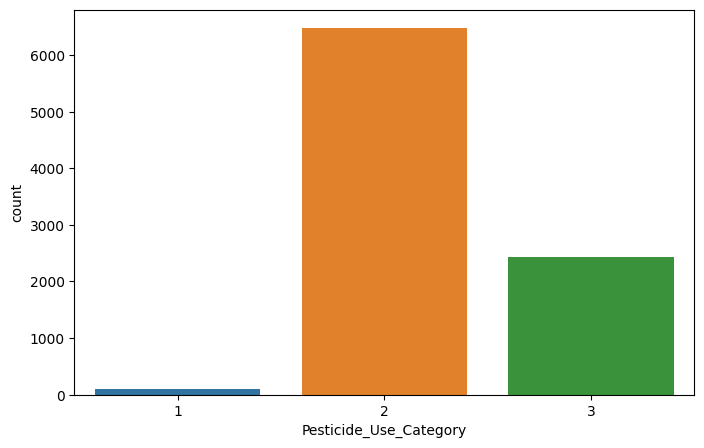

In [ ]:
NaN_df = train_dataframe[train_dataframe.Number_Weeks_Used.isnull()]

# countplot of pesticide category when weeks_used is NaN
plt.figure(figsize=(8, 5))
sb.countplot(x=NaN_df['Pesticide_Use_Category'])

In [ ]:
# Make case for no correlation calculation when NaN present
# After manual inpection + count plot shows that whenever pesticide type 1, number of weeks used is O but has value whenever pesticide type 2 or 3.
# And so we fill with mean.

In [ ]:
mean = train_dataframe['Number_Weeks_Used'].mean()

# Define a function to apply the conditions and fill NaN values
def fill_nan(row):
    if pd.isna(row['Number_Weeks_Used']):
        if row['Pesticide_Use_Category'] == 1:
            return 0
        elif row['Pesticide_Use_Category'] == 2 or row['Pesticide_Use_Category'] == 3:
            return mean
    return row['Number_Weeks_Used']

# Apply the function to the column
train_dataframe['Number_Weeks_Used'] = train_dataframe.apply(fill_nan, axis=1) # same as train_dataframe['Number_Weeks_Used'].apply(lambda x: fill_nan(x))

In [ ]:
train_dataframe.head(15) # inspect after filling of NaN values

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,0.0,0,2,1
6,F00000009,448,0,1,1,0,0.0,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2


In [ ]:
#drop ID too : no information content, can lead to overfitting (rand), dimentionality reduction and model efficiency
train_dataframe.drop('ID', axis=1, inplace=True)

In [ ]:
train_dataframe

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
88853,3337,1,0,2,10,12.0,44,3,0
88854,3516,1,0,2,10,20.0,38,1,0
88855,3516,1,0,2,15,40.0,8,2,0
88856,3702,1,0,2,10,25.0,18,3,0


## Exploratory Data Analysis

<Axes: xlabel='Crop_Damage', ylabel='count'>

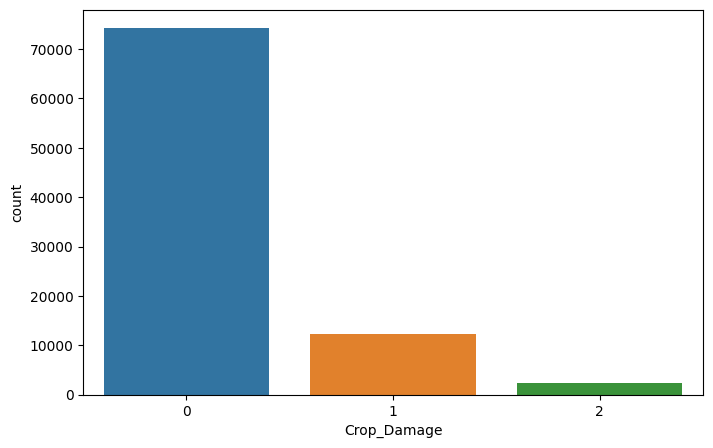

In [ ]:
# countplot of crop damage : Looking at class frequencies
plt.figure(figsize=(8, 5))
sb.countplot(x=train_dataframe['Crop_Damage'])

### Looking for correlation

#### With Point Biserial Correlation Coefficient

In [ ]:
# Edit later to make it work

import scipy.stats as stats


for feature in train_dataframe.columns:
    if feature != 'Crop_Damage':
        for class_label in train_dataframe['Crop_Damage'].unique():
            class_data = train_dataframe[train_dataframe['Crop_Damage'] == class_label][feature]
            correlation, p_value = stats.pointbiserialr(class_data, train_dataframe[train_dataframe['Crop_Damage'] == class_label]['Crop_Damage'])
            print(f'Feature: {feature}, Class: {class_label}, Correlation: {correlation}, p-value: {p_value}')


Feature: Estimated_Insects_Count, Class: 0, Correlation: nan, p-value: nan
Feature: Estimated_Insects_Count, Class: 1, Correlation: nan, p-value: nan
Feature: Estimated_Insects_Count, Class: 2, Correlation: nan, p-value: nan
Feature: Crop_Type, Class: 0, Correlation: nan, p-value: nan
Feature: Crop_Type, Class: 1, Correlation: nan, p-value: nan
Feature: Crop_Type, Class: 2, Correlation: nan, p-value: nan
Feature: Soil_Type, Class: 0, Correlation: nan, p-value: nan
Feature: Soil_Type, Class: 1, Correlation: nan, p-value: nan
Feature: Soil_Type, Class: 2, Correlation: nan, p-value: nan
Feature: Pesticide_Use_Category, Class: 0, Correlation: nan, p-value: nan
Feature: Pesticide_Use_Category, Class: 1, Correlation: nan, p-value: nan
Feature: Pesticide_Use_Category, Class: 2, Correlation: nan, p-value: nan
Feature: Number_Doses_Week, Class: 0, Correlation: nan, p-value: nan
Feature: Number_Doses_Week, Class: 1, Correlation: nan, p-value: nan
Feature: Number_Doses_Week, Class: 2, Correlation

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


#### With Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = train_dataframe.drop('Crop_Damage', axis=1)
y = train_dataframe['Crop_Damage']

# Train a Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X, y)

feature_importances = clf.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f'Feature: {feature}, Importance: {importance}')


Feature: Estimated_Insects_Count, Importance: 0.32070493380448983
Feature: Crop_Type, Importance: 0.011088527381761788
Feature: Soil_Type, Importance: 0.015039005842727906
Feature: Pesticide_Use_Category, Importance: 0.03203372703454131
Feature: Number_Doses_Week, Importance: 0.14708934453358755
Feature: Number_Weeks_Used, Importance: 0.28320684909987454
Feature: Number_Weeks_Quit, Importance: 0.14993674882616825
Feature: Season, Importance: 0.04090086347684888


# Model selection

## Feature Scaling and Mean Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures # might need polynomial features to avoid overfitting

In [ ]:
X = train_dataframe.drop('Crop_Damage', axis=1)
y = train_dataframe['Crop_Damage']

In [ ]:
#with normalization, gradient descent can converge more quickly
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#may run after cross validation if metrics shows underfitting
# quad = PolynomialFeatures(interaction_only=True, include_bias=False)#default degree of 2
# X_poly = quad.fit_transform(X)

Put this [image](https://scikit-learn.org/stable/_static/ml_map.png) from [sklearn docs](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) about model selection in slides

## Building a dummy classifier

As shown [ealier](https://colab.research.google.com/drive/1OJHKy-OCOb2X35JXQI0WBBnonMAGGojw#scrollTo=klAOMeKdlYKI&line=3&uniqifier=1), most of the crop are not damaged and so we have a skewed data. This can as well be visualized in percentages.

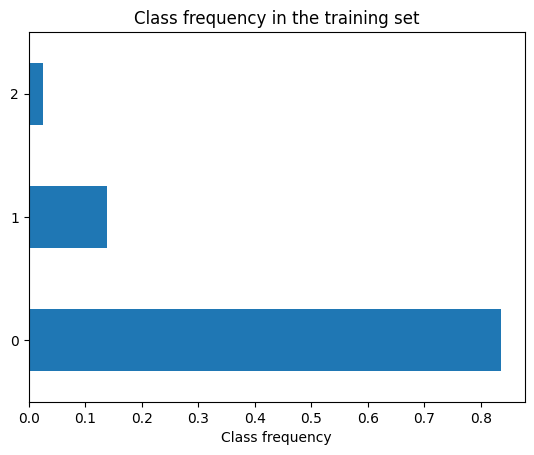

In [ ]:
y.value_counts(normalize=True).plot.barh()
plt.xlabel("Class frequency")
_ = plt.title("Class frequency in the training set")

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, test_size=0.33, random_state=42
    )

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X, y)
print(
    "Accuracy of the dummy classifier: "
    f"{dummy_classifier.score(X_test, y_test):.3f}"
)

In [ ]:
target_predicted = dummy_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(dummy_classifier, X_test, y_test)

In [ ]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy = balanced_accuracy_score(y_test, target_predicted)
print(f"Balanced accuracy: {balanced_accuracy:.3f}")

## Buiding models

### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV

X = train_dataframe.drop('Crop_Damage', axis=1)
y = train_dataframe['Crop_Damage']


# It's good practice to scale your data for these algorithms
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Stratified K-Folds cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define models and the hyperparameters to tune
model_params = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C': [0.1, 1, 10, 100],
            'solver': ['newton-cg', 'lbfgs', 'liblinear']
        }
    },
    # 'LinearSVC': {
    #     'model': CalibratedClassifierCV(LinearSVC(random_state=42), cv=3),
    #     'params': {
    #         'base_estimator__C': [0.1, 1, 10, 100]  # base_estimator__ prefix for CalibratedClassifierCV
    #     }
    # },
    'K Neighbors Classifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    }
}

# Conduct grid search for each model
for name, mp in model_params.items():
    clf = GridSearchCV(
        estimator=mp['model'],
        param_grid=mp['params'],
        cv=skf,
        scoring='f1_weighted',  # for multi-class classification problem
        n_jobs=-1,
        verbose=2
    )

    print(f'Tuning hyperparameters of {name}...')
    clf.fit(X_scaled, y)
    print(f'Best hyperparameters for {name}: {clf.best_params_}')
    print(f'Best score for {name}: {clf.best_score_:.4f}\n')


Tuning Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best score for Logistic Regression: 0.7726

Tuning K Neighbors Classifier...
Fitting 5 folds for each of 32 candidates, totalling 160 fits


KeyboardInterrupt: ignored

### Baselines

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import LearningCurveDisplay
from sklearn.model_selection import learning_curve

X = train_dataframe.drop('Crop_Damage', axis=1)
y = train_dataframe['Crop_Damage']

# It's good practice to scale data for these algorithms
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define models
models = {
    'Logistic_Regression': LogisticRegression(C=0.1, solver=liblinear, n_jobs=-1, random_state=42),
    'LinearSVC': CalibratedClassifierCV(LinearSVC(random_state=42), cv=3, n_jobs=-1),
    'K_Neighbors_Classifier': KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
}

# Stratified K-Folds cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Metrics holder for later comparisons
metrics_dict = {
    'Model': [],
    'F1 Score': [],
    'Precision': [],
    'Recall': []
}

for name, model in models.items():
    f1_scores, precision_scores, recall_scores = [], [], []

    for fold_num, (train_index, test_index) in enumerate(skf.split(X_scaled, y), 1):
        print(f"Processing Fold {fold_num} for {name}")  # Debugging print statement for folds

        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        print(f'Training {name}...')  # Debugging to check convergence of models
        model.fit(X_train, y_train)
        print(f'Trained {name}!')  # Debugging to check convergence of models
        y_pred = model.predict(X_test)

        f1_scores.append(f1_score(y_test, y_pred, average='weighted')) # for multi-class classification problem
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))

    print(f'Model: {name}')
    print(f'F1 Score: {sum(f1_scores) / len(f1_scores):.4f}')
    print(f'Precision: {sum(precision_scores) / len(precision_scores):.4f}')
    print(f'Recall: {sum(recall_scores) / len(recall_scores):.4f}\n')

    # Plot learning curve
    train_sizes, train_scores, test_scores = \
        learning_curve(model, X_scaled, y, cv=skf, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)) # add , scoring='f1_macro'
    lc_display = LearningCurveDisplay(train_scores, test_scores, train_sizes).plot()
    plt.title(f'Learning Curve for {name}')
    plt.show()

    # Append mean scores to metrics_dict
    metrics_dict['Model'].append(name)
    metrics_dict['F1 Score'].append(np.mean(f1_scores))
    metrics_dict['Precision'].append(np.mean(precision_scores))
    metrics_dict['Recall'].append(np.mean(recall_scores))



Processing Fold 1 for Logistic Regression
Training Logistic Regression...
Trained Logistic Regression!
Processing Fold 2 for Logistic Regression
Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Trained Logistic Regression!
Processing Fold 3 for Logistic Regression
Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Trained Logistic Regression!
Processing Fold 4 for Logistic Regression
Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Trained Logistic Regression!
Processing Fold 5 for Logistic Regression
Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Trained Logistic Regression!
Model: Logistic Regression
F1 Score: 0.7721
Precision: 0.7584
Recall: 0.8333

Processing Fold 1 for LinearSVC
Training LinearSVC...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Trained LinearSVC!
Processing Fold 2 for LinearSVC
Training LinearSVC...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Trained LinearSVC!
Processing Fold 3 for LinearSVC
Training LinearSVC...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Trained LinearSVC!
Processing Fold 4 for LinearSVC
Training LinearSVC...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Trained LinearSVC!
Processing Fold 5 for LinearSVC
Training LinearSVC...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Trained LinearSVC!
Model: LinearSVC
F1 Score: 0.7726
Precision: 0.7583
Recall: 0.8331

Processing Fold 1 for K Neighbors Classifier
Training K Neighbors Classifier...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Trained K Neighbors Classifier!
Processing Fold 2 for K Neighbors Classifier
Training K Neighbors Classifier...
Trained K Neighbors Classifier!
Processing Fold 3 for K Neighbors Classifier
Training K Neighbors Classifier...
Trained K Neighbors Classifier!
Processing Fold 4 for K Neighbors Classifier
Training K Neighbors Classifier...
Trained K Neighbors Classifier!
Processing Fold 5 for K Neighbors Classifier
Training K Neighbors Classifier...
Trained K Neighbors Classifier!
Model: K Neighbors Classifier
F1 Score: 0.8018
Precision: 0.7893
Recall: 0.8366



In [ ]:
# # Plotting decision boundaries
# # selected only two features for simplicity
# # X_values = X[['Estimated_Insects_Count', 'Season']].values  # place features of choice here
# X_values = X.values
# y_values = y.values

# # # Initialize models
# # models = {
# #     'Logistic_Regression': LogisticRegression(C=1e5, multi_class='ovr', max_iter=10000, random_state=42),
# #     'SVC': SVC(decision_function_shape='ovr', random_state=42),
# #     'lSVC': LinearSVC(dual="auto", tol=1e-5),
# #     'K_Neighbors_Classifier': Pipeline([
# #         ('nca', NeighborhoodComponentsAnalysis(random_state=42)),
# #         ('knn', KNeighborsClassifier())
# #     ])
# # }
# value=1.5
# width=0.75

# # plot decision boundaries
# for model_name, model in models.items():
#     # model.fit(X_values, y_values)

#     plt.figure()
#     plot_decision_regions(
#         X_values, y_values, clf=model,
#         feature_index=[0,7],
#         filler_feature_values={1:value, 2: value, 3:value, 4:value, 5:value, 6: value, 7:value},
#         filler_feature_ranges={1:value, 2: value, 3:value, 4:value, 5:value, 6: value, 7:value},
#         legend=2)
#     plt.title(f'Decision Boundary for {model_name}')
#     plt.show()


Since decision boundaries are not working, I will plot the learning curves

### Ensemble models

HistGradientBoosting, Stacking, Voting  for generalizability / robustness

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier, VotingClassifier, StackingClassifier

X = train_dataframe.drop('Crop_Damage', axis=1)
y = train_dataframe['Crop_Damage']

# It's good practice to scale data for these algorithms
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define base models for StackingClassifier and VotingClassifier
base_models = [
    ('Logistic Regression', LogisticRegression(n_jobs=-1, random_state=42)),
    ('Calibrated LinearSVC', CalibratedClassifierCV(LinearSVC(random_state=42), cv=3, n_jobs=-1)),
    ('K Neighbors Classifier', KNeighborsClassifier(n_jobs=-1))
]

# Define classifiers
models = {
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(random_state=42),
    'VotingClassifier': VotingClassifier(estimators=base_models, voting='soft', n_jobs=-1),
    'StackingClassifier': StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=42,), n_jobs=-1)
}

# Stratified K-Folds cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    f1_scores, precision_scores, recall_scores = [], [], []

    for fold_num, (train_index, test_index) in enumerate(skf.split(X_scaled, y), 1):
        print(f"Processing Fold {fold_num} for {name}")  # Debugging print statement for folds

        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        print(f'Training {name}...')  # Debugging print statement
        model.fit(X_train, y_train)
        print(f'Trained {name}!')  # Debugging print statement

        y_pred = model.predict(X_test)

        # Assuming a multi-class classification problem
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))

    print(f'Model: {name}')
    print(f'F1 Score: {sum(f1_scores) / len(f1_scores):.4f}')
    print(f'Precision: {sum(precision_scores) / len(precision_scores):.4f}')
    print(f'Recall: {sum(recall_scores) / len(recall_scores):.4f}\n')

    # Plot learning curve
    train_sizes, train_scores, test_scores = \
        learning_curve(model, X_scaled, y, cv=skf, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)) # add , scoring='f1_macro'
    lc_display = LearningCurveDisplay(train_scores, test_scores, train_sizes).plot()
    plt.title(f'Learning Curve for {name}')
    plt.show()

    # Append mean scores to metrics_dict
    metrics_dict['Model'].append(name)
    metrics_dict['F1 Score'].append(np.mean(f1_scores))
    metrics_dict['Precision'].append(np.mean(precision_scores))
    metrics_dict['Recall'].append(np.mean(recall_scores))


Processing Fold 1 for HistGradientBoostingClassifier
Training HistGradientBoostingClassifier...
Trained HistGradientBoostingClassifier!
Processing Fold 2 for HistGradientBoostingClassifier
Training HistGradientBoostingClassifier...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Trained HistGradientBoostingClassifier!
Processing Fold 3 for HistGradientBoostingClassifier
Training HistGradientBoostingClassifier...
Trained HistGradientBoostingClassifier!
Processing Fold 4 for HistGradientBoostingClassifier
Training HistGradientBoostingClassifier...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Trained HistGradientBoostingClassifier!
Processing Fold 5 for HistGradientBoostingClassifier
Training HistGradientBoostingClassifier...
Trained HistGradientBoostingClassifier!
Model: HistGradientBoostingClassifier
F1 Score: 0.8039
Precision: 0.7971
Recall: 0.8469

Processing Fold 1 for VotingClassifier
Training VotingClassifier...
Trained VotingClassifier!


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Processing Fold 2 for VotingClassifier
Training VotingClassifier...
Trained VotingClassifier!


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Processing Fold 3 for VotingClassifier
Training VotingClassifier...
Trained VotingClassifier!


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Processing Fold 4 for VotingClassifier
Training VotingClassifier...
Trained VotingClassifier!


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Processing Fold 5 for VotingClassifier
Training VotingClassifier...
Trained VotingClassifier!


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: VotingClassifier
F1 Score: 0.7763
Precision: 0.7653
Recall: 0.8350

Processing Fold 1 for StackingClassifier
Training StackingClassifier...
Trained StackingClassifier!


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Processing Fold 2 for StackingClassifier
Training StackingClassifier...
Trained StackingClassifier!


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Processing Fold 3 for StackingClassifier
Training StackingClassifier...
Trained StackingClassifier!


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Processing Fold 4 for StackingClassifier
Training StackingClassifier...
Trained StackingClassifier!


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Processing Fold 5 for StackingClassifier
Training StackingClassifier...
Trained StackingClassifier!
Model: StackingClassifier
F1 Score: 0.7885
Precision: 0.7738
Recall: 0.8364



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model evaluation and comparison

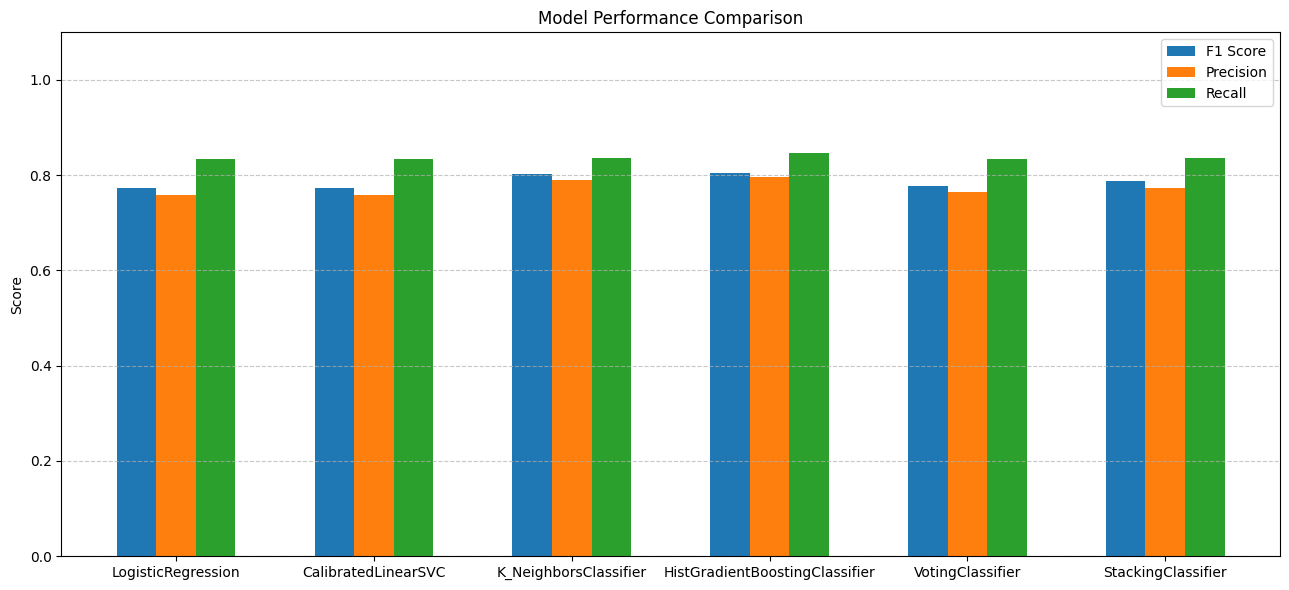

In [ ]:

# # can manually populate metrics_dict:
# metrics_dict = {
#     'Model': [
#         'LogisticRegression', 'CalibratedLinearSVC', 'K_NeighborsClassifier',
#         'HistGradientBoostingClassifier', 'VotingClassifier', 'StackingClassifier'
#     ],
#     'F1 Score': [0.7726, 0.7726, 0.8018, 0.8039, 0.7763, 0.7885],
#     'Precision': [0.7584, 0.7583, 0.7893, 0.7971, 0.7653, 0.7738],
#     'Recall': [0.8333, 0.8331, 0.8366, 0.8469, 0.8350, 0.8364]
# }

# Convert to DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics_dict)

# Set the figure size
plt.figure(figsize=(13, 6))

# Number of metrics
n_metrics = len(metrics_df.columns) - 1  # Exclude 'Model' column
bar_width = 0.2  # Width of the bars
bar_positions = np.arange(len(metrics_df['Model']))  # Positions of the bars on the X-axis

for i, metric in enumerate(metrics_df.columns[1:]):
    plt.bar(
        bar_positions + i * bar_width,
        metrics_df[metric],
        width=bar_width,
        label=metric
    )

# Set the X-axis ticks to be the names of the models
plt.xticks(bar_positions + bar_width, metrics_df['Model'])
plt.legend()
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1.1)  # Set y-axis range to be 0 to 1.1 for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
